In [62]:
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [63]:
#reading in an image
def read_image(file_name):
    image = mpimg.imread(file_name)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)
    roi=region_of_interest(edges, vertices)
    lines = hough_lines(roi, 2, np.pi / 180, 1, 3, 1)
    result = cv2.addWeighted(image, 0.8, lines, 1., 0.)

    plt.figure(figsize=(25,15))
    plt.subplot(171), plt.imshow(image)
    plt.title("origin"), plt.xticks([]), plt.yticks([])
    plt.subplot(172), plt.imshow(gray, cmap='gray')
    plt.title("gray"), plt.xticks([]), plt.yticks([])
    plt.subplot(173), plt.imshow(blur, cmap='gray')
    plt.title("blur"), plt.xticks([]), plt.yticks([])
    plt.subplot(174), plt.imshow(edges, cmap='gray')
    plt.title("edges"), plt.xticks([]), plt.yticks([])
    plt.subplot(175), plt.imshow(roi, cmap='gray')
    plt.title("roi"), plt.xticks([]), plt.yticks([])
    plt.subplot(176), plt.imshow(lines, cmap='gray')
    plt.title("lines"), plt.xticks([]), plt.yticks([])
    plt.subplot(177), plt.imshow(result)
    plt.title("result"), plt.xticks([]), plt.yticks([])
    plt.show()

In [64]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    """
    This function draws the lines with an inplace drawing.
    Here, the lines and the mainline are drawn.
    """   
    
    left_edge=[left_bottom,apex]
    right_edge=[right_bottom,apex]
    
    left_lines=[]
    right_lines=[]
    left_points=[]
    right_points=[]
    
    #Separating the line into left and right lines
    for line in lines:
        for x1,y1,x2,y2 in line:
            #Only for formatting
            point_line=[(x1,y1),(x2,y2)]
            element_line=[x1,y1,x2,y2]
            
            #What is closer?
            if(linediff(left_edge,point_line)<linediff(right_edge,point_line)):
            #Closer to left
                left_lines.append([element_line])
                left_points.append([x1,y1])
                left_points.append([x2,y2])
            else:
            #Closer to right
                right_lines.append([element_line])
                right_points.append([x1,y1])
                right_points.append([x2,y2])
    
    #Drawing the mainLanes in red
    draw_mainLane(img,right_points)
    draw_mainLane(img,left_points)
    
    #Drawing the little lines (green for left lane, blue for right lane)
    for line in left_lines:        
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), [255, 0, 0], thickness)
           
    for line in right_lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), [255, 0, 0], thickness)

def draw_mainLane(img,points):
    """
    This function draws the main lane with the given points.
        
    Returns an image with hough lines drawn.
    """
    #Calculate the length of the vector
    x_values=(np.array(points))[:,0]
    y_values=(np.array(points))[:,1]
    x_values.sort()
    y_values.sort()
    
    #Get last 10&
    percent=0.2
    highest_x=x_values[-int(x_values.size*percent):].mean()
    lowest_x=x_values[:int(x_values.size*percent)].mean()
    highest_y=y_values[-int(y_values.size*percent):].mean()
    lowest_y=y_values[:int(y_values.size*percent)].mean()
    
    #Calculate the distance between the two points 
    dist=cv2.norm((highest_x,highest_y), (lowest_x,lowest_y))
    
    [vx,vy,x0,y0] = cv2.fitLine(np.array(points, dtype=np.int32), cv2.DIST_L2,0,0.01,0.01)
    
    #m is the length of the vector
    m=dist*0.5
    x1=int(x0-m*vx)
    y1=int(y0-m*vy)
    x2=int(x0+m*vx)
    y2=int(y0+m*vy)
    
    #Finally, draw the line
    cv2.line(img, (x1, y1), (x2, y2), [255, 0, 0], 30)
        
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img


def linediff(firstline, secondline):
    """
    Calculates the minimum distance between two lines (calculated with perpendicular vector)
    input parameter:
    firstline - line that contains the x1,y1,x2,y2 for one line
    secondline -line that contains the x1,y1,x2,y2 for second line
    
    returns - shortest distance between lines
    """

    #Calculate the cross product to a perpendicular vector 
    (Fx1,Fy1),(Fx2,Fy2) = firstline
    (Sx1,Sy1),(Sx2,Sy2) = secondline
    Fdx,Fdy = Fx2-Fx1,Fy2-Fy1
    Sdx,Sdy = Sx2-Sx1,Sy2-Sy1
    
    perpen_vec_dx,perpen_vec_dy = (Fdy - Sdy, Sdx-Fdx)

    #Perpen_vecp_normalized = perpen_vec / distance of common perp
    perpen_vec_length = math.hypot(perpen_vec_dx,perpen_vec_dy)
    
    perpen_vec_normalized_dx = perpen_vec_dx/float(perpen_vec_length)
    perpen_vec_normalized_dy = perpen_vec_dy/float(perpen_vec_length)

    #step3: length of (pointonline1-pointonline2 dotprod normalized_perp).
    short_vec_dx = (Fx1-Sx1)*perpen_vec_normalized_dx
    short_vec_dy = (Fy1-Sy1)*perpen_vec_normalized_dy

    minimum_distance = math.hypot(short_vec_dx,short_vec_dy)
    
    return minimum_distance

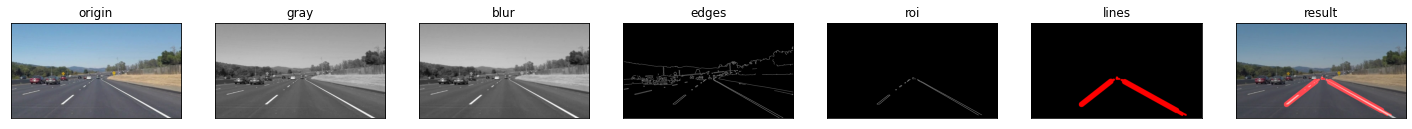

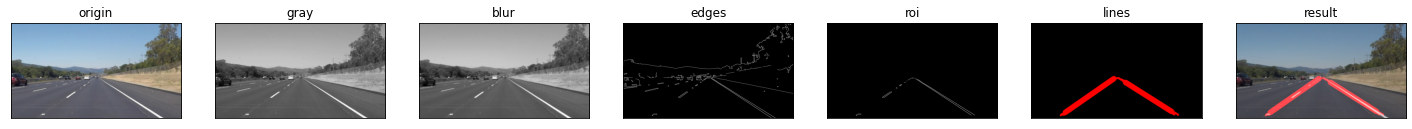

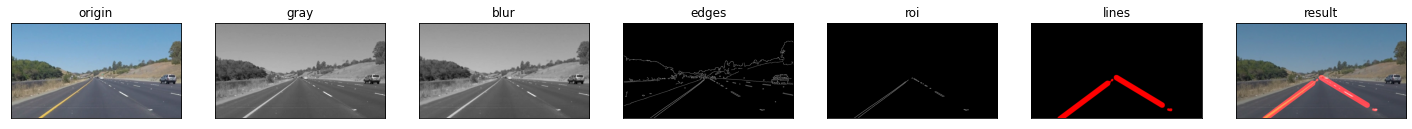

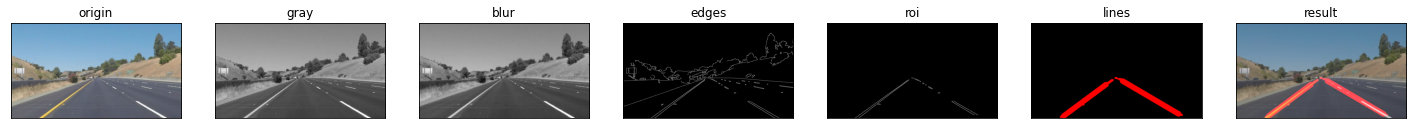

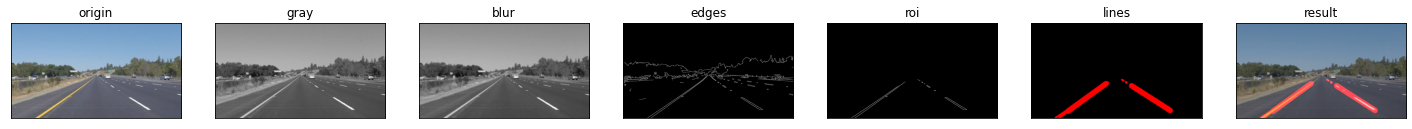

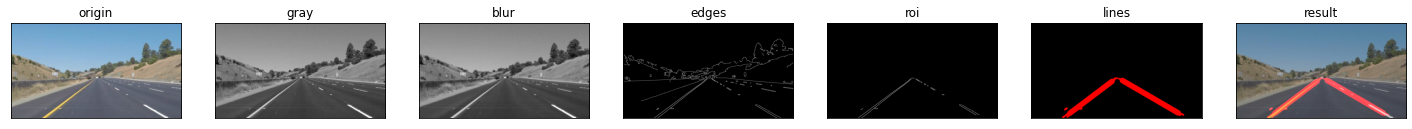

In [65]:
import os
import cv2
import matplotlib.image as mpimg

test_images=os.listdir("test/images/")
output_directory='results/images/'

try:
    os.stat(output_directory)
except:
    os.mkdir(output_directory)       

#Going through every test_image
for file_name in test_images:
    read_image('test/images/'+file_name)